In [1]:
# Decision Tree Model as Baseline Model
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from processing import *

In [2]:
# import data
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v5.csv'
df = pd.read_csv(file_path)
data = df.copy()
data.head()

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],FROPCOM0006[S5],...,romberg_EyesOpen_SwayDensity,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State
0,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,1.0,...,29.84,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0
1,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.80,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1
2,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.80,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0
3,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,30.44,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0
4,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.88,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0


In [3]:
# Split data into X and y
X = data.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).values
y = data['Frailty_State'].values


In [4]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)

In [5]:
# perform CVBKNN imputation
imputed_data_scaled, best_k_scaled = cvbknn_imputer(X_Scaled, n_splits=5, k_values=[1,3,5,7,9], verbose=True)

Avg error for k=1: 0.1102688374135958
Avg error for k=3: 0.06915104232223349
Avg error for k=5: 0.06405243946515407
Avg error for k=7: 0.06339877912746203
Avg error for k=9: 0.0603977095953467


In [6]:
# Revert to original scale
imputed_data_original_scale = scaler.inverse_transform(imputed_data_scaled)

In [7]:
best_k_scaled, pd.DataFrame(imputed_data_original_scale).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 87.3 KB


(9, None)

In [8]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(imputed_data_original_scale, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

In [10]:
# Fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Predict the test set
y_pred = dt.predict(X_test)

In [12]:
# Evaluate the model
accuracy_Score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred)

# Print the results in a table
results = pd.DataFrame([['Decision Tree', accuracy_Score, f1]], columns=['Model', 'Accuracy Score', 'F1 Score'])
print(results)


           Model  Accuracy Score  F1 Score
0  Decision Tree            0.85  0.832258


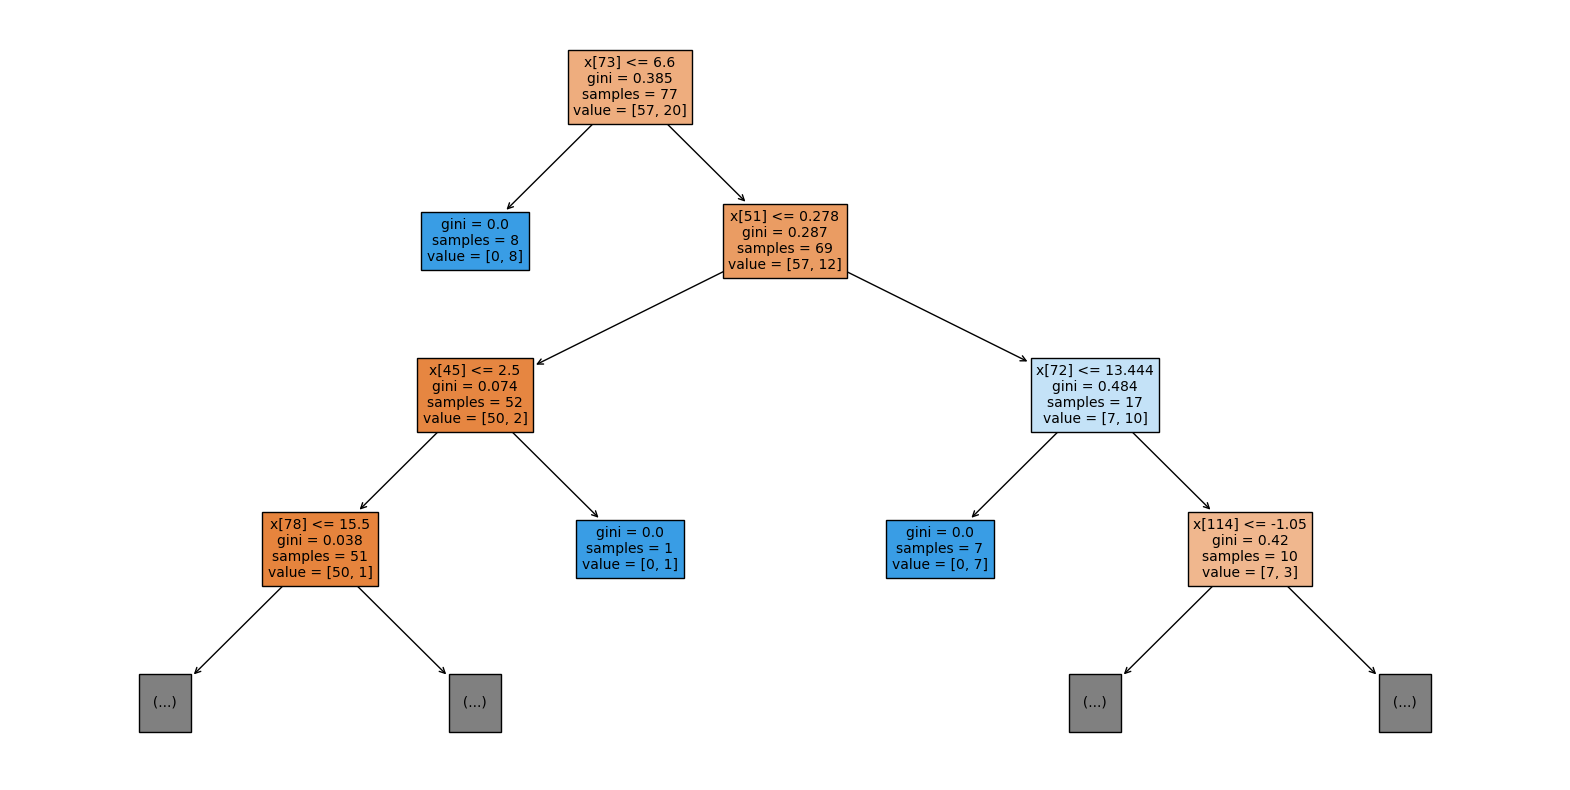

In [30]:
# ploting the tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, max_depth=3, fontsize=10)
plt.show()

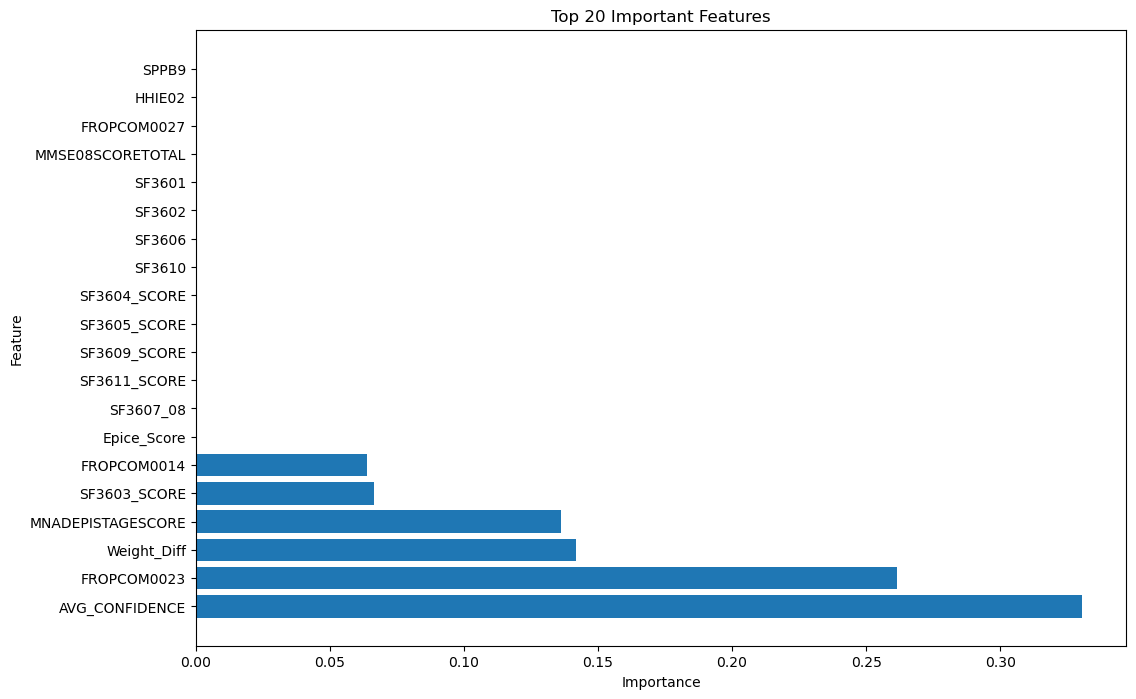

,Feature,Importance
73,AVG_CONFIDENCE,0.330435
51,FROPCOM0023,0.261551
114,Weight_Diff,0.141842
72,MNADEPISTAGESCORE,0.136280
78,SF3603_SCORE,0.066219
45,FROPCOM0014,0.063673
84,Epice_Score,0.000000
83,SF3607_08,0.000000
82,SF3611_SCORE,0.000000
81,SF3609_SCORE,0.000000


In [31]:
# Extracting feature importance from the Decision Tree model
feature_importance = dt.feature_importances_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(['Frailty_State', 'Frailty_Score'], axis=1).columns,
    'Importance': feature_importance
})

# Sorting the features based on their importance
feature_importance_sorted = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting the top 20 important features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.show()

feature_importance_sorted


In [ ]:
# Importing additional libraries for feature selection
from sklearn.feature_selection import RFE
from boruta import BorutaPy

# Initialize and run Boruta for feature selection
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42, verbose=0, max_iter=100)
boruta_selector.fit(X_train_orig, y_train_orig)

# Get the selected features based on Boruta
selected_features_boruta = np.array(df.drop(['Frailty_State', 'Frailty_Score'], axis=1).columns)[boruta_selector.support_]

# Initialize and run RFE (Recursive Feature Elimination) for feature selection
rfe_selector = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=20, step=10, verbose=0)
rfe_selector.fit(X_train_orig, y_train_orig)

# Get the selected features based on RFE
selected_features_rfe = np.array(df.drop(['Frailty_State', 'Frailty_Score'], axis=1).columns)[rfe_selector.support_]

# Comparison of selected features by Boruta and RFE
common_features = set(selected_features_boruta).intersection(set(selected_features_rfe))

len(selected_features_boruta), len(selected_features_rfe), len(common_features), list(common_features)


In [ ]:
# Initialize and run RFE (Recursive Feature Elimination) for feature selection
rfe_selector = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=20, step=10, verbose=0)
rfe_selector.fit(X_train_orig, y_train_orig)

# Get the selected features based on RFE
selected_features_rfe = np.array(df.drop(['Frailty_State', 'Frailty_Score'], axis=1).columns)[rfe_selector.support_]

# Display the selected features
selected_features_rfe.tolist()


In [ ]:
# Select only the important features based on RFE for training the Decision Tree model
X_train_rfe = X_train_orig[:, rfe_selector.support_]
X_test_rfe = X_test_orig[:, rfe_selector.support_]

# Initialize and train the Decision Tree model on the selected features
dt_clf_rfe = DecisionTreeClassifier(random_state=42)
dt_clf_rfe.fit(X_train_rfe, y_train_orig)

# Model Evaluation
y_pred_dt_rfe = dt_clf_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test_orig, y_pred_dt_rfe)

# Plotting the Decision Tree (showing only the top few levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_clf_rfe, filled=True, feature_names=selected_features_rfe, max_depth=3, fontsize=10)
plt.show()

accuracy_dt_rfe
